In [18]:
# Testcell
import numpy as np
x=np.array([1,4,1])
y=np.array([1,2,3])
z2=x*y
print(z2)
z=x@y
max(3,4)
print(np.append(np.random.exponential(4, (10,2)),np.random.exponential(0.5, (10,2))))



[1 8 3]
[ 6.89157929  3.97291194  1.86933348  2.49578467 12.540049    9.21061792
  3.25183378 11.40364988  1.87251194  0.47048124  6.78471177  1.48547021
  0.77980848  1.70530711  3.93658317 12.91194614  8.36956811  4.69669012
  4.50198237  0.04256438  0.80455765  0.18480867  0.22663796  0.34090565
  1.00298651  0.30689907  1.26465817  0.05582667  0.67974575  0.16741849
  0.50507813  1.04114811  0.13364835  0.11449898  1.59673565  0.52948034
  0.02684264  1.05191965  2.16751894  0.15426682]


In [32]:
import numpy as np

#f = lambda t: np.sum(b[1:]*y*(x*t))+b[0]

def OneStep(x, fx, y, b, C, i, j):
    b_iold = b[i]
    b_jold = b[j]
    d = y[i]*(fx[j]-y[j]-fx[i]+y[i])
    s = y[i]*y[j]
    chi = x[i]@x[i]+x[j]@x[j]-2*x[i]@x[j]
    gamma = s*b[i]+b[j]
    if s == 1:
        L = max(0,gamma-C)
        H = min(gamma, C)
    else:
        L = max(0,-gamma)
        H = min(C,C-gamma)
        
    if chi>0:
        b[i] = min(max(b[i]+d/chi,L),H)
    else:
        if d>0: b[i] = L
        else: b[i] = H
    b[j] = gamma-s*b[i]
    fx = fx + (b[i]-b_iold)*y[i]*(x@x[i]) + (b[j]-b_jold)*y[j]*(x@x[j])
    b[-1] = b[-1] + (fx[j]-y[j]-fx[i]+y[i])/2
    return(b, fx)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]


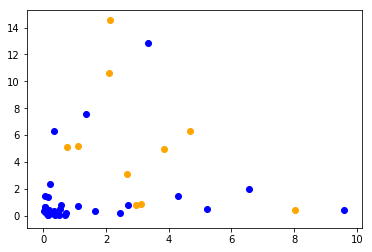

In [36]:
import matplotlib.pyplot as plt

x = np.append(np.random.exponential(4, (20,2)),np.random.exponential(0.5, (20,2)),0)
y = np.append(-np.ones(20),np.ones(20))
plt.scatter(x[:10,0],x[:10,1],c='orange')
plt.scatter(x[10:,0],x[10:,1],c='blue')
              
plt.show()
              
    

In [49]:
def PlotContourLine(func, value=0, minx=0, maxx=10, miny=0, maxy=10):
    #This plots the contourline func(x) = value
    
    samplenum = 1000
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    print(argsForf.shape)
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    #plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, colors=('red', 'blue'))

In [57]:
def SMO(x, y, num_iter, C):
    beta = np.zeros(x.shape[0]+1)
    fx = np.zeros(x.shape[0])
    for i in range(num_iter):
        indices = np.random.choice(np.arange(0,beta.size-1), 2, False)
        (beta, fx) = OneStep(x, fx, y, beta, C, indices[0], indices[1])
    beta[0] = beta[0] - np.sum(fx - y, 0)/fx.shape[0]
    return beta

for c in [0.01, 1, 100]:
    beta = SMO(x, y, 10000, c)
    print((beta[:-1]*y)[np.newaxis].shape)
    f = lambda t: np.dot((beta[:-1]*y, (x@t.T))+beta[-1]
    PlotContourLine(f)
    plt.scatter(x[:10,0],x[:10,1], c='orange')
    plt.scatter(x[10:,0],x[10:,1],c='blue')
    plt.plot()

SyntaxError: invalid syntax (<ipython-input-57-f9e5f6a518b8>, line 14)